# Identificação

## Turma
Turma: *PROJETO APLICADO III 2024/2*

# Integrantes do Grupo
André Dalle Vedove Canassa – 10415817

Valdo Alvim da Rocha Junior – 10414936

Victor Teodoro - 10414609

# Modelo de recomendação de livros por meio da avaliação de leitores

O projeto realizado pela equipe da Universidade Presbiteriana Mackenzie, Faculdade de Computação e Informática, tem como objetivo desenvolver um modelo de recomendação de livros baseado em avaliações de usuários, utilizando técnicas de aprendizado de máquina para analisar padrões de preferências e comportamentos de leitura. A meta principal é criar um sistema capaz de sugerir livros personalizados para cada usuário, com base em suas avaliações anteriores e nas similaridades entre usuários e livros, promovendo uma experiência de recomendação precisa e eficiente.

Os dados utilizados foram coletados do site Kaggle e compreendem informações de avaliações de livros, usuários e informações sobre os livros.

O projeto define um modelo analítico que inclui o uso da linguagem de programação Python e bibliotecas, sendo elas: pandas, numpy, matplotlib, seaborn, sklearn e scipy.sparse. O cronograma detalhado inclui encontros síncronos, períodos de trabalho e entregas das etapas do projeto.


## Origem dos Dados
Os dados utilizados neste projeto foram obtidos a partir do conjunto de dados disponível na plataforma Kaggle, especificamente do conjunto intitulado "Book Recommender System". Este conjunto de dados é acessível através do link: https://www.kaggle.com/datasets/rxsraghavagrawal/book-recommender-system/code

### Descrição dos Dados

1. **BX-Books.csv**: contém informações sobre os livros, e cada coluna descreve uma característica de cada livro listado.
   
   Colunas relevantes:
   - `ISBN`: Identificador único para cada livro 
   - `Book-Title`: O título do livro
   - `Book-Author`: O autor do livro
   - `Year-Of-Publication`: O ano de publicação do livro
   - `Publisher`: A editora que publicou o livro
   - `Image-URL-S, Image-URL-M, Image-URL-L`: URLs de imagens da capa do livro em três diferentes tamanhos (pequeno, médio e grande)   


2. **BX-Users.csv**: Este arquivo contém revisões dos imóveis listados.

   Colunas:
   - `User-ID`: Identificador único para cada usuário
   - `Location`: A localização do usuário, geralmente no formato "cidade, estado, país"
   - `Age`: A idade do usuário


2. **BX-Book-Ratings.csv**: Este arquivo contém revisões dos imóveis listados.

   Colunas:
   - `User-ID`: Identificador único para cada usuário
   - `ISBN`: Identificador único para cada livro
   - `Book-Rating`: A avaliação dada ao livro pelo usuário.
````

In [1]:
import pandas as pd      # Para manipulação de dados
import numpy as np       # Para operações matemáticas
import matplotlib.pyplot as plt  # Para visualização
import seaborn as sns    # Para visualizações aprimoradas
from sklearn.model_selection import train_test_split  # Para dividir os dados
from sklearn.metrics import mean_squared_error  # Para avaliar o modelo
from scipy.sparse import csr_matrix  # Para lidar com matrizes esparsas
from sklearn.neighbors import NearestNeighbors  # Para modelo KNN

## Importação da base de dados, análise exploratória e tratamento dos dados ##

In [2]:
# Carregar dados
books = pd.read_csv('../data/BX-Books.csv', sep=';', encoding='latin-1', low_memory=False, on_bad_lines='skip')
users = pd.read_csv('../data/BX-Users.csv', sep=';', encoding='latin-1', low_memory=False, on_bad_lines='skip')
ratings = pd.read_csv('../data/BX-Book-Ratings.csv', sep=';', encoding='latin-1', low_memory=False, on_bad_lines='skip')

# Verificar as primeiras linhas
display(books)
display(users)
display(ratings)

# Verificar os tipos de dados e valores ausentes
print(books.info())
print(users.info())
print(ratings.info())


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), obje

In [3]:
# Remover entradas com valores ausentes
books_cleaned = books.dropna()

In [4]:
#limpeza de informações irrelevantes e renomear colunas
books.rename(columns= {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)
users.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'},inplace=True)
ratings.rename(columns={'User-ID':'user_id','Book-Rating':'book_rating'}, inplace=True)
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [5]:
books

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [6]:
#Quantidade de ratings(avaliações) por usuário
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [7]:
#Usuários que tem mais de 100 avaliações, vamos nomear essa variável de x
x = ratings['user_id'].value_counts() > 100
display(x)

user_id
11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: count, Length: 105283, dtype: bool

In [8]:
#Quantidade de usuários que fizeram mais de 100 avaliações, vamos nomear essa variável de y
y = x[x].index
print(y.shape)

(1825,)


In [9]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       238186,  99441, 187410, 262070,  70183,  40553,  39345, 266283, 189666,
       140879],
      dtype='int64', name='user_id', length=1825)

In [10]:
#Trazer somente usuários que avaliaram mais de 100 vezes 
ratings = ratings[ratings['user_id'].isin(y)]

In [11]:
ratings

,user_id,ISBN,book_rating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0
...,...,...,...
1149633,276680,1884910033,0
1149634,276680,1888173408,7
1149635,276680,1888173564,8
1149636,276680,1888173572,0


In [12]:
#Juntando Tabelas de Avaliação com a Tabela de livros com Join ou Merge, chave primária = ISBN
rating_books = ratings.merge(books, on = 'ISBN')
rating_books

,user_id,ISBN,book_rating,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...,http://images.amazon.com/images/P/0060520507.0...,http://images.amazon.com/images/P/0060520507.0...
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...,http://images.amazon.com/images/P/0060930934.0...,http://images.amazon.com/images/P/0060930934.0...
3,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...,http://images.amazon.com/images/P/0060951303.0...,http://images.amazon.com/images/P/0060951303.0...
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...,http://images.amazon.com/images/P/0140154078.0...,http://images.amazon.com/images/P/0140154078.0...
...,...,...,...,...,...,...,...,...,...,...
604849,276680,1884910033,0,Fiction Writer's Workshop,Josip Novakovich,1995,F &amp; W Pubns,http://images.amazon.com/images/P/1884910033.0...,http://images.amazon.com/images/P/1884910033.0...,http://images.amazon.com/images/P/1884910033.0...
604850,276680,1888173408,7,Fairy Tale (Common Reader Editions),Alice Thomas Ellis,2001,Akadine Press,http://images.amazon.com/images/P/1888173408.0...,http://images.amazon.com/images/P/1888173408.0...,http://images.amazon.com/images/P/1888173408.0...
604851,276680,1888173564,8,Parnassus on Wheels (Common Reader Editions),Christopher Morley,2000,Joiner/Oriel Inc,http://images.amazon.com/images/P/1888173564.0...,http://images.amazon.com/images/P/1888173564.0...,http://images.amazon.com/images/P/1888173564.0...
604852,276680,1888173572,0,Haunted Bookshop (Common Reader Editions),Christopher Morley,2000,Akadine Press,http://images.amazon.com/images/P/1888173572.0...,http://images.amazon.com/images/P/1888173572.0...,http://images.amazon.com/images/P/1888173572.0...


In [13]:
# Quantidade de vezes que o livro foi avaliado
number_ratings = rating_books.groupby('title')['book_rating'].count().reset_index()
number_ratings

,title,book_rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
182179,Ã?Â?berraschung am Valentinstag.,1
182180,Ã?Â?lpiraten.,1
182181,Ã?Â?rger mit Produkt X. Roman.,2
182182,Ã?Â?stlich der Berge.,1


In [14]:
number_ratings.rename(columns={'book_rating':'number_of_ratings'}, inplace=True)
number_ratings

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
182179,Ã?Â?berraschung am Valentinstag.,1
182180,Ã?Â?lpiraten.,1
182181,Ã?Â?rger mit Produkt X. Roman.,2
182182,Ã?Â?stlich der Berge.,1


In [15]:
#Tabela Final juntar a tabela de livros (rating_books) com as avaliações com a tabela de quantidade de avaliações por livros (number_ratings)
final_rating = rating_books.merge(number_ratings, on='title')
final_rating.drop(columns={'Image-URL-S', 'Image-URL-L', 'Image-URL-M'}, inplace=True)
final_rating

,user_id,ISBN,book_rating,title,author,year,publisher,number_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,16
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,12
3,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,8
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,6
...,...,...,...,...,...,...,...,...
604849,276680,1884910033,0,Fiction Writer's Workshop,Josip Novakovich,1995,F &amp; W Pubns,5
604850,276680,1888173408,7,Fairy Tale (Common Reader Editions),Alice Thomas Ellis,2001,Akadine Press,1
604851,276680,1888173564,8,Parnassus on Wheels (Common Reader Editions),Christopher Morley,2000,Joiner/Oriel Inc,2
604852,276680,1888173572,0,Haunted Bookshop (Common Reader Editions),Christopher Morley,2000,Akadine Press,2


In [16]:
#Verificando a existência de anos incorretos ou incoerentes
unique_years = final_rating['year'].unique()
print(unique_years)

['1994' '2003' '1999' '1995' '1993' '1990' '2004' '1998' '2002' '1997'
 '2001' '2000' '1988' '1982' '1996' '1991' '1989' '1985' '1984' '1979'
 '1992' '1974' '1986' '1977' '1972' '1983' '1987' '1958' '1980' '1978'
 '1975' '1959' '1981' '0' '1960' '1968' '1976' '1970' '1971' '1969' '1973'
 '1950' '1953' '1966' '1963' '1965' '1930' '1957' '1964' '1962' '1961'
 '1952' '1940' '1954' '1967' '1946' '1943' '1920' '1951' '1956' '1923'
 '1945' '1947' '1937' '1955' '1925' '1942' '1948' '1927' '2030' '2005'
 '2011' '1941' '2020' '1939' '1936' '1938' '1911' '1929' '1944' '1932'
 '1933' '1922' '1926' '1897' '1949' '2050' '1902' '1924' '1921' '1900'
 '2038' '2006' '1901' '2026' '2021' '1378' 'DK Publishing Inc' 'Gallimard'
 '1928' '1906' '1806' '1935' '2010']


In [17]:
# Convertendo a coluna 'year' para numérico, forçando erros a se tornarem NaN
final_rating['year'] = pd.to_numeric(final_rating['year'], errors='coerce')

# Filtrando anos válidos: entre 1900 e 2023
final_rating = final_rating[(final_rating['year'] >= 1900) & (final_rating['year'] <= 2023)]

# Mostrando a nova base de dados
print(final_rating)

        user_id        ISBN  book_rating  \
0        276925  002542730X           10   
1        276925  0060520507            0   
2        276925  0060930934            0   
3        276925  0060951303            0   
4        276925  0140154078            6   
...         ...         ...          ...   
604849   276680  1884910033            0   
604850   276680  1888173408            7   
604851   276680  1888173564            8   
604852   276680  1888173572            0   
604853   276680  1931561648            9   

                                                    title              author  \
0       Politically Correct Bedtime Stories: Modern Ta...   James Finn Garner   
1           Sushi for Beginners : A Novel (Keyes, Marian)        Marian Keyes   
2               Wasted : A Memoir of Anorexia and Bulimia    Marya Hornbacher   
3                               La casa de los espÃ­ritus      Isabel Allende   
4                                     The Music of Chance         

In [18]:
unique_years = final_rating['year'].unique()
print(unique_years)

[1994. 2003. 1999. 1995. 1993. 1990. 2004. 1998. 2002. 1997. 2001. 2000.
 1988. 1982. 1996. 1991. 1989. 1985. 1984. 1979. 1992. 1974. 1986. 1977.
 1972. 1983. 1987. 1958. 1980. 1978. 1975. 1959. 1981. 1960. 1968. 1976.
 1970. 1971. 1969. 1973. 1950. 1953. 1966. 1963. 1965. 1930. 1957. 1964.
 1962. 1961. 1952. 1940. 1954. 1967. 1946. 1943. 1920. 1951. 1956. 1923.
 1945. 1947. 1937. 1955. 1925. 1942. 1948. 1927. 2005. 2011. 1941. 2020.
 1939. 1936. 1938. 1911. 1929. 1944. 1932. 1933. 1922. 1926. 1949. 1902.
 1924. 1921. 1900. 2006. 1901. 2021. 1928. 1906. 1935. 2010.]


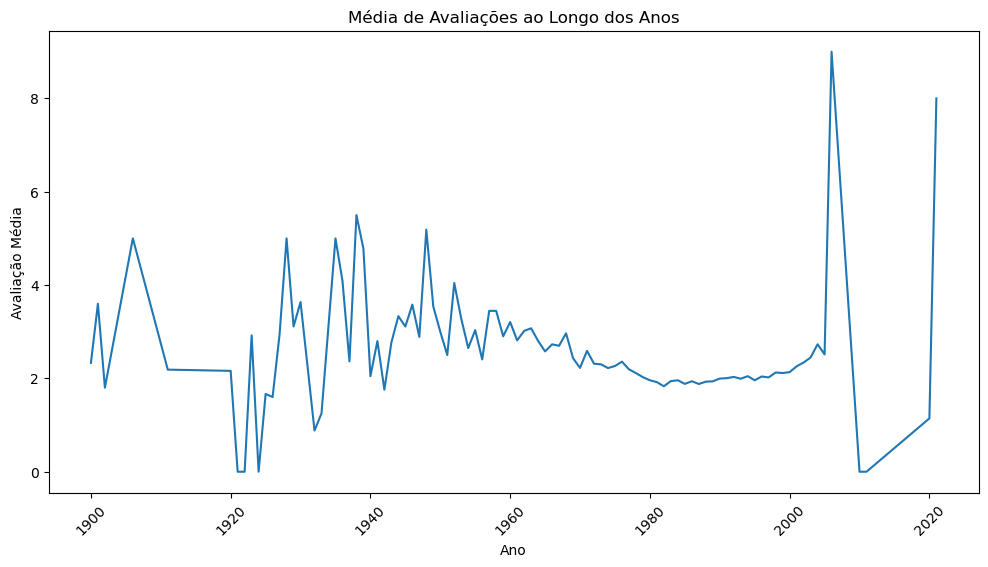

In [19]:
# Média de avaliações ao longo dos anos
avg_rating_per_year = final_rating.groupby('year')['book_rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values)
plt.title('Média de Avaliações ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Avaliação Média')
plt.xticks(rotation=45)
plt.show()


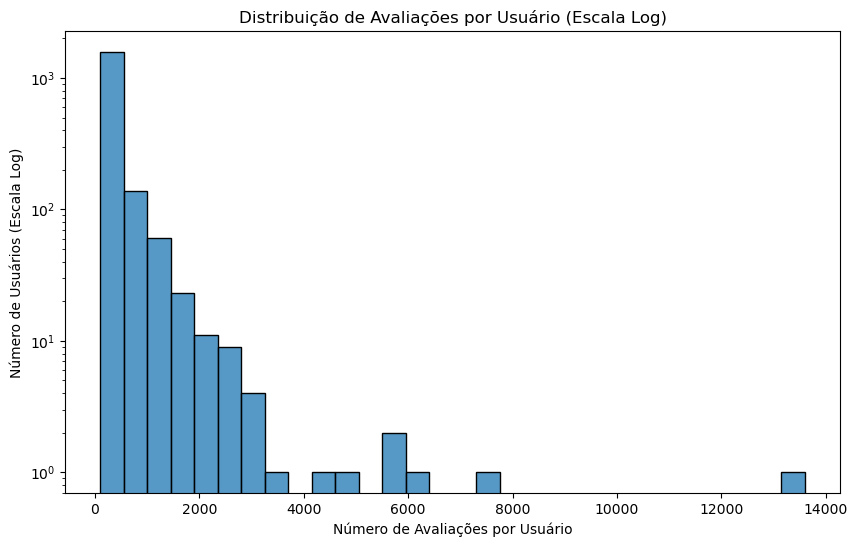

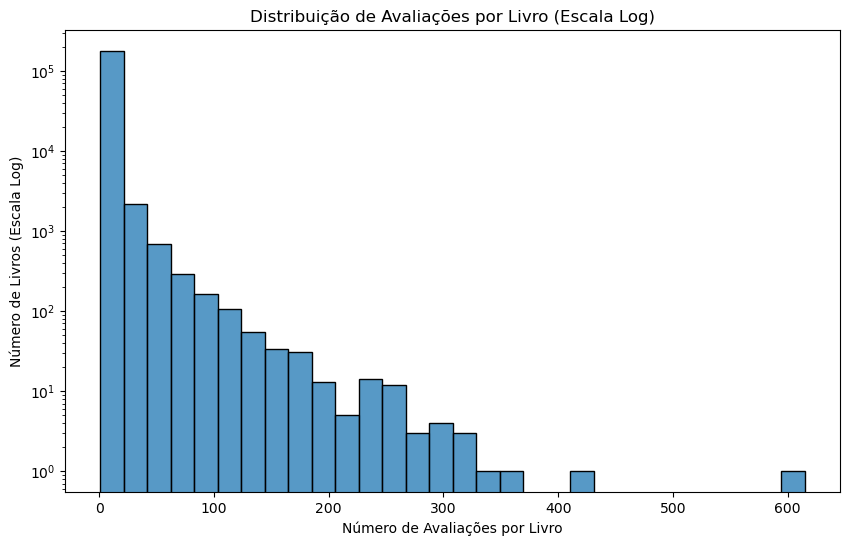

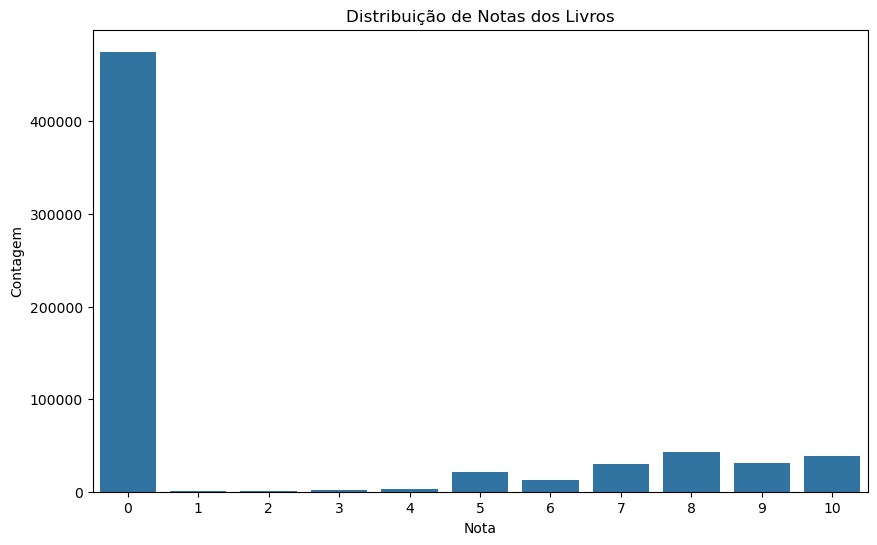

In [20]:
# 1. Distribuição do número de livros avaliados por usuário
user_ratings_count = ratings.groupby('user_id')['book_rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=30, kde=False)
plt.yscale('log')  # Escala logarítmica no eixo y
plt.title('Distribuição de Avaliações por Usuário (Escala Log)')
plt.xlabel('Número de Avaliações por Usuário')
plt.ylabel('Número de Usuários (Escala Log)')
plt.show()

# 2. Disparidade no número de avaliações por livro
book_ratings_count = final_rating.groupby('title')['book_rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(book_ratings_count, bins=30, kde=False)
plt.yscale('log')  # Escala logarítmica no eixo y
plt.title('Distribuição de Avaliações por Livro (Escala Log)')
plt.xlabel('Número de Avaliações por Livro')
plt.ylabel('Número de Livros (Escala Log)')
plt.show()

# 3. Concentração de valores altos de ratings (4 e 5)
plt.figure(figsize=(10, 6))
sns.countplot(x='book_rating', data=ratings)
plt.title('Distribuição de Notas dos Livros')
plt.xlabel('Nota')
plt.ylabel('Contagem')
plt.show()


#### Transformação da base em uma Matriz

As avaliações dos usuários serão usadas como variáveis para fazer a análise preditiva.



In [23]:
#filtrar livros que tenham mais de 50 avaliações 
final_rating = final_rating[final_rating['number_of_ratings'] > 50]
final_rating

,user_id,ISBN,book_rating,title,author,year,publisher,number_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
5,276925,0140327592,0,Matilda,Roald Dahl,1990.0,Viking Penguin Inc,79
12,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",430
15,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003.0,Doubleday,335
37,276925,0804106304,0,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),263
...,...,...,...,...,...,...,...,...
604805,276680,0688163165,10,Mystic River,Dennis Lehane,2001.0,William Morrow &amp; Company,167
604811,276680,0743411323,0,Never Change,Elizabeth Berg,2001.0,Atria,57
604815,276680,0743422449,0,Mercy,Jodi Picoult,2001.0,Washington Square Press,100
604820,276680,0743486226,6,Angels &amp; Demons,Dan Brown,2003.0,Atria,265


In [24]:
#Descartar valores duplicados
final_rating.loc[:,('user_id','title')]
final_rating

,user_id,ISBN,book_rating,title,author,year,publisher,number_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,105
5,276925,0140327592,0,Matilda,Roald Dahl,1990.0,Viking Penguin Inc,79
12,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",430
15,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003.0,Doubleday,335
37,276925,0804106304,0,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),263
...,...,...,...,...,...,...,...,...
604805,276680,0688163165,10,Mystic River,Dennis Lehane,2001.0,William Morrow &amp; Company,167
604811,276680,0743411323,0,Never Change,Elizabeth Berg,2001.0,Atria,57
604815,276680,0743422449,0,Mercy,Jodi Picoult,2001.0,Washington Square Press,100
604820,276680,0743486226,6,Angels &amp; Demons,Dan Brown,2003.0,Atria,265


In [25]:
# transposição dos usuários (user_id) em colunas:
book_pivot = final_rating.pivot_table(columns ='user_id', index='ISBN', values='book_rating')
book_pivot.shape

(3141, 1792)

In [26]:
book_pivot

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0001047973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0006177379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0020697406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002542730X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN
002542730x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0000T6KIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0000VZEH8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0001FZGPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Transformar valores nulos em zero
book_pivot.fillna(0, inplace=True)
book_pivot

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0001047973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006177379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0020697406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
002542730x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0000T6KIM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0000VZEH8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0001FZGPI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparação dos Dados para Modelagem

Utilizando o algoritmo KNN (K-nearest neighbors), este método classifica cada amostra do conjunto de dados com base na proximidade dos vizinhos mais próximos. O KNN calcula a distância entre a amostra e seus vizinhos, e se a maioria desses vizinhos pertencer a uma determinada classe, a amostra será atribuída a essa mesma categoria.

In [40]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from typing import Tuple, List

def create_train_test_matrices(
    rating_matrix: np.ndarray,
    test_size: float = 0.2,
    random_state: int = 42
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Split rating matrix into train and test matrices using sklearn's train_test_split.
    
    Parameters:
    rating_matrix: Original rating matrix (items × users)
    test_size: Proportion of ratings to use for testing
    random_state: Random seed for reproducibility
    
    Returns:
    Tuple of (train_matrix, test_matrix)
    """
    # Create masks for rated items (where rating > 0)
    rated_mask = rating_matrix > 0
    n_ratings = np.sum(rated_mask)
    
    # Get indices of rated items
    rated_indices = np.where(rated_mask)
    ratings = rating_matrix[rated_mask]
    
    # Split the indices into train and test sets
    train_indices, test_indices, train_ratings, test_ratings = train_test_split(
        list(zip(rated_indices[0], rated_indices[1])),
        ratings,
        test_size=test_size,
        random_state=random_state
    )
    
    # Create train and test matrices
    train_matrix = np.zeros_like(rating_matrix)
    test_matrix = np.zeros_like(rating_matrix)
    
    # Fill train matrix
    for (i, j), rating in zip(train_indices, train_ratings):
        train_matrix[i, j] = rating
    
    # Fill test matrix
    for (i, j), rating in zip(test_indices, test_ratings):
        test_matrix[i, j] = rating
    
    return train_matrix, test_matrix

def calculate_recommender_metrics(
    rating_matrix: np.ndarray,
    test_matrix: np.ndarray,
    k_neighbors: int = 5,
    k_recommendations: int = 10
) -> Tuple[float, float, float]:
    """
    Calculate performance metrics for an item-based KNN recommender system.
    
    Parameters:
    rating_matrix: Training rating matrix (items × users)
    test_matrix: Test rating matrix (items × users)
    k_neighbors: Number of neighbors for KNN
    k_recommendations: Number of top items to recommend
    
    Returns:
    Tuple of (MSE, Precision@K, Recall@K)
    """
    n_items, n_users = rating_matrix.shape
    
    # Initialize KNN model
    knn = NearestNeighbors(n_neighbors=k_neighbors + 1, metric='cosine')
    knn.fit(rating_matrix)
    
    # Get neighbors for each item
    distances, indices = knn.kneighbors(rating_matrix)
    
    # Remove self from neighbors (first column)
    indices = indices[:, 1:]
    distances = distances[:, 1:]
    
    # Calculate predictions
    predictions = np.zeros_like(test_matrix)
    
    for user_idx in range(n_users):
        # Get user ratings
        user_ratings = rating_matrix[:, user_idx]
        
        # For each item
        for item_idx in range(n_items):
            if user_ratings[item_idx] == 0:  # Only predict unrated items
                # Get item's neighbors that user has rated
                neighbor_ratings = []
                neighbor_sims = []
                
                for neighbor_idx, sim_distance in zip(indices[item_idx], distances[item_idx]):
                    if user_ratings[neighbor_idx] > 0:
                        neighbor_ratings.append(user_ratings[neighbor_idx])
                        # Convert distance to similarity
                        neighbor_sims.append(1 - sim_distance)
                
                if neighbor_ratings:  # If we found rated neighbors
                    # Weighted average of neighbor ratings
                    predictions[item_idx, user_idx] = np.average(
                        neighbor_ratings,
                        weights=neighbor_sims
                    )
    
    # Calculate MSE (only for items that have ratings in test set)
    mask = test_matrix > 0
    mse = mean_squared_error(
        test_matrix[mask],
        predictions[mask]
    )
    
    # Calculate Precision and Recall@K
    precision_sum = 0
    recall_sum = 0
    n_test_users = 0
    
    for user_idx in range(n_users):
        # Get actual and predicted ratings for this user
        actual = test_matrix[:, user_idx]
        pred = predictions[:, user_idx]
        
        if np.sum(actual > 0) > 0:  # Only evaluate users with test ratings
            n_test_users += 1
            
            # Get top K recommended items
            rec_items = np.argsort(pred)[-k_recommendations:]
            
            # Get relevant items (rated in test set)
            rel_items = np.where(actual > 0)[0]
            
            # Calculate metrics
            n_relevant_recommended = len(set(rec_items) & set(rel_items))
            precision_sum += n_relevant_recommended / k_recommendations
            recall_sum += n_relevant_recommended / len(rel_items)
    
    precision_at_k = precision_sum / n_test_users if n_test_users > 0 else 0
    recall_at_k = recall_sum / n_test_users if n_test_users > 0 else 0
    
    return mse, precision_at_k, recall_at_k


rating_matrix = book_pivot.values

# Split into train and test sets
train_matrix, test_matrix = create_train_test_matrices(
    rating_matrix,
    test_size=0.2,
    random_state=42
)

# Calculate metrics
mse, precision, recall = calculate_recommender_metrics(
    train_matrix,
    test_matrix,
    k_neighbors=2,
    k_recommendations=2
)

print("Rating matrix shape:", rating_matrix.shape)
print("Number of ratings:", np.sum(rating_matrix > 0))
print(f"Train matrix ratings: {np.sum(train_matrix > 0)}")
print(f"Test matrix ratings: {np.sum(test_matrix > 0)}")
print(f"\nMetrics:")
print(f"MSE: {mse:.4f}")
print(f"Precision@K: {precision:.4f}")
print(f"Recall@K: {recall:.4f}")

Rating matrix shape: (3141, 1792)
Number of ratings: 27132
Train matrix ratings: 21705
Test matrix ratings: 5427

Metrics:
MSE: 59.7170
Precision@K: 0.0383
Recall@K: 0.0235
